In [1]:
import pandas as pd
import numpy as np
import ast
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
directory_path = "C:\\Users\\Gajavalli's\\Documents\\MS projects\\venky uk - sentiment analysis\\data\\"
file_name = 'news_dataset_pre_processed.csv'

# Data Loading

In [3]:
df = pd.read_csv(directory_path + file_name, low_memory=False)

In [4]:
df.head()

,title,text,subject,date,label,title_len,text_len,caps_in_title,norm_caps_in_title,caps_in_text,norm_caps_in_text,text_tokens,text_urls,clean_text,title_urls,twitter_handles,clean_title,clean_text_tokens,clean_title_tokens
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,fake,79,2893,11,0.139241,138,0.047701,"['Donald', 'Trump', 'just', 'couldn', 't', 'wi...",['pic.twitter.com/4FPAe2KypA'],donald trump just couldn t wish all americans ...,[],"['@realDonaldTrump', '@TalbertSwan', '@calvins...",donald trump sends out embarrassing new year’s...,"['donald', 'trump', 'just', 'couldn', 'wish', ...","['donald', 'trump', 'sends', 'out', 'embarrass..."
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,fake,69,1898,8,0.115942,88,0.046365,"['House', 'Intelligence', 'Committee', 'Chairm...",[],house intelligence committee chairman devin nu...,[],[],drunk bragging trump staffer started russian c...,"['house', 'intelligence', 'committee', 'chairm...","['drunk', 'bragging', 'trump', 'staffer', 'sta..."
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,fake,90,3597,15,0.166667,308,0.085627,"['On', 'Friday', 'it', 'was', 'revealed', 'tha...","['pic.twitter.com/XtZW5PdU2b', 'pic.twitter.co...","on friday, it was revealed that former milwauk...",[],"['@SheriffClarke', '@SheriffClarke', '@KeithLe...",sheriff david clarke becomes an internet joke ...,"['on', 'it', 'was', 'revealed', 'that', 'forme...","['sheriff', 'david', 'clarke', 'becomes', 'an'..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,fake,78,2774,19,0.243590,123,0.044340,"['On', 'Christmas', 'day', 'Donald', 'Trump', ...","['https://t.co/Fg7VacxRtJ', 'pic.twitter.com/5...","on christmas day, donald trump announced that ...",[],"['@pbump', '@_cingraham', '@_cingraham', '@_ci...",trump is so obsessed he even has obama’s name ...,"['on', 'christmas', 'day', 'donald', 'trump', ...","['trump', 'is', 'so', 'obsessed', 'he', 'even'..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,fake,70,2346,11,0.157143,63,0.026854,"['Pope', 'Francis', 'used', 'his', 'annual', '...",[],pope francis used his annual christmas day mes...,[],[],pope francis just called out donald trump duri...,"['pope', 'francis', 'used', 'his', 'annual', '...","['pope', 'francis', 'just', 'called', 'out', '..."


In [5]:
df.clean_text_tokens = df.clean_text_tokens.map(ast.literal_eval)
df.clean_title_tokens = df.clean_title_tokens.map(ast.literal_eval)

# splitdata

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df[['title', 'norm_caps_in_title']], 
                                                    df['label'],
                                                   test_size = 0.2,
                                                   random_state = 42,
                                                   stratify = df['label'])

In [7]:
X_train.shape

(30910, 2)

In [8]:
X_test.shape

(7728, 2)

# Encode Labels

In [9]:
le = LabelEncoder()

In [10]:
y_train_enc = le.fit_transform(y_train)

In [11]:
y_test_enc = le.transform(y_test)

# Test Training Set

In [12]:
# Based on observation true news has less than 0.14% capital letters and fake news has >=0.14% capitals in title
# Considering the break_point = 0.14

In [13]:
def predction(percent_capitals, threshold):
    if percent_capitals >= threshold:
        return 0
    else:
        return 1

In [14]:
y_train_enc_hat = X_train['norm_caps_in_title'].apply(lambda x: predction(x, 0.14))

In [15]:
print(classification_report(y_train_enc, y_train_enc_hat, target_names=le.classes_))

              precision    recall  f1-score   support

        fake       0.99      0.96      0.97     13957
        true       0.97      0.99      0.98     16953

    accuracy                           0.98     30910
   macro avg       0.98      0.97      0.98     30910
weighted avg       0.98      0.98      0.98     30910



In [19]:
cm = confusion_matrix(y_train_enc, y_train_enc_hat)

In [20]:
matrix = ConfusionMatrixDisplay(confusion_matrix = cm,
                                display_labels = le.classes_)

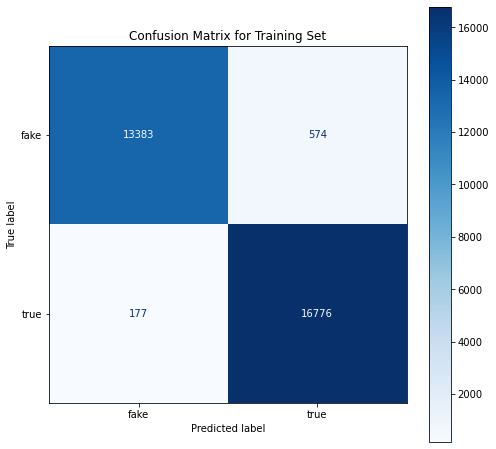

In [21]:
fig, ax = plt.subplots(figsize = (8, 8))
matrix = matrix.plot(include_values = True, 
                     cmap = plt.cm.Blues, 
                     ax = ax, 
                     xticks_rotation = 'horizontal',
                     values_format = 'd')
matrix.ax_.set_title('Confusion Matrix for Training Set')
plt.show()

In [22]:
cm_norm = confusion_matrix(y_train_enc, y_train_enc_hat, normalize='true')
matrix_norm = ConfusionMatrixDisplay(confusion_matrix = cm_norm,
                                     display_labels = le.classes_)

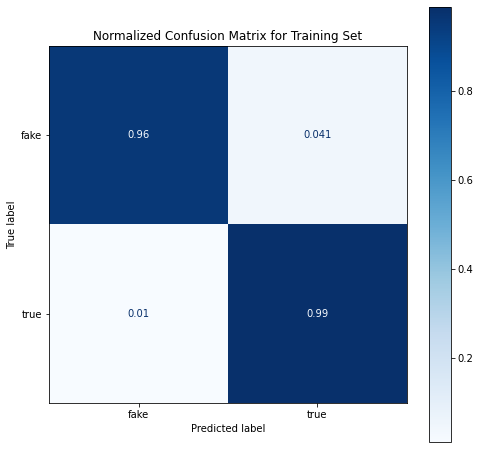

In [23]:
fig, ax = plt.subplots(figsize = (8, 8))
matrix_norm = matrix_norm.plot(include_values = True, 
                               cmap = plt.cm.Blues, 
                               ax = ax, 
                               xticks_rotation = 'horizontal')
matrix_norm.ax_.set_title('Normalized Confusion Matrix for Training Set')
plt.show()

# Miclassified data

In [24]:
X_train.reset_index(drop=True, inplace=True)
y_train_enc_hat.reset_index(drop=True, inplace=True)

In [25]:
df_with_results = pd.concat([X_train, pd.Series(y_train_enc), pd.Series(y_train_enc_hat)], 
                            axis=1, ignore_index=True)

In [26]:
df_with_results.columns = ['title', 'norm_caps_in_title', 'label', 'label_predicted']

In [27]:
df_fake_as_true = df_with_results[(df_with_results.label == 0) & (df_with_results.label_predicted == 1)]

In [28]:
pd.set_option('display.max_colwidth', None)

In [29]:
df_fake_as_true.head()

,title,norm_caps_in_title,label,label_predicted
6,President Obama Arrives in Cuba,0.129032,0,1
11,"51 Companies Are Pledging Over $650 Million In Refugee Support, White House Announces",0.127907,0,1
29,Ben Carson: Homeless Shelters Shouldn’t Be “Comfortable” Because People Might “Stay”,0.129412,0,1
30,Hillary Clinton: “Victory Fund” Gets Massive Cash Injection from Hedge Fund Management (Soros),0.127660,0,1
41,BOOM! This Is How President Reagan Handled Protesters: “Negotiate? What is there to negotiate?” [Video],0.135922,0,1


sample of True News titles there were misclassified as Fake

In [30]:
df_true_as_fake = df_with_results[(df_with_results.label == 1) & (df_with_results.label_predicted == 0)]

In [31]:
df_true_as_fake.head()

,title,norm_caps_in_title,label,label_predicted
101,"Factbox: Trump on Twitter (Nov. 28) - NFL, First Lady",0.169811,1,0
107,Saudi Crown Prince calls Iran leader 'new Hitler': NYT,0.148148,1,0
176,U.S. Senate backs Montenegro's membership in NATO,0.163265,1,0
657,UNESCO selects France's Azoulay as new chief,0.181818,1,0
658,EDF wants to take part in Saudi nuclear plans: CEO,0.140000,1,0


# Correctly Classified Stories

In [32]:
df_true_as_true = df_with_results[(df_with_results.label == 1) & (df_with_results.label_predicted == 1)]

In [33]:
df_true_as_true.head()

,title,norm_caps_in_title,label,label_predicted
0,"Magnitude 6.2 quake hits southeast of Oaxaca, Mexico: USGS",0.120690,1,1
1,Defense chief say he has power to set Afghan troop levels,0.035088,1,1
2,Democrats seek probe of Trump donation to Florida attorney general,0.045455,1,1
3,Pennsylvania attorney general resigns following perjury conviction,0.015152,1,1
4,Trump reaches out to lawmakers on healthcare as another says 'no',0.015385,1,1


In [34]:
df_fake_as_fake = df_with_results[(df_with_results.label == 0) & (df_with_results.label_predicted == 0)]

In [35]:
df_fake_as_fake.head()

,title,norm_caps_in_title,label,label_predicted
5,"Trump Just Visited His Home State, And New Yorkers Told Him To Get F*cked (IMAGES/VIDEO)",0.280899,0,0
7,"HUGE Spending Agreement Reached: GOP Caves On Sending 10,000 Syrian Refugees",0.197368,0,0
8,OBAMA’S REVEALING LETTER TO BROTHER TELLS WHY BARACK GOT INTO POLITICS,0.842857,0,0
9,BIZARRE WARNING FROM OBAMA Campaign Manager Screams Shadow Government Coup,0.391892,0,0
10,McCain CALLS OUT Trump: Show Us The Evidence!,0.326087,0,0


# Summary

1. Tried Non ML model by using percentage of capital letters in a news post title.
2. The Fake news contains lot of capital words or most of the words starts with capital letter.
3. True news are that capitalize the first letter of title and proper nouns.
4. Using this method observed that 98% of accuracy and the 2% of misclassified news are the amount of Ture news misclassified as fake is slightly lower than vice versa.
5. I think this text overfits to this dataset, there may be more fake news like the 2% that is misclassified in data.